# Environmental Conditions in Vienna

[![Binder](http://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/anitagraser/ogd-at-lab/main?urlpath=lab/tree/notebooks/environment.ipynb)




In [10]:
import hvplot.pandas
import pandas as pd
import geopandas as gpd
from utils.dataaccess import get_gdf_from_wfs, get_airquality_df, get_heatvulnerabilityindex_gdf

## Urban Heat

Dataset: [Urban Heat Vulnerability Index (UHVI)](https://www.data.gv.at/katalog/dataset/urban-heat-vulnerability-index-uhvi-wien)

In [11]:
uhvi = get_heatvulnerabilityindex_gdf()

In [12]:
uhvi.hvplot(geo=True, tiles='OSM', c='AVG_UHVI_A', title='Average Urban Heat Vulnerability Index - All age groups', cmap='Reds', alpha=0.7).opts(active_tools=['wheel_zoom'])

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (AVG_UHVI_A)

## Air Quality

Dataset: [Luftmessnetz: aktuelle Messdaten Wien](https://www.data.gv.at/katalog/dataset/luftmessnetz-aktuelle-messdaten-wien/)

In [13]:
stations = get_gdf_from_wfs('LUFTGUETENETZOGD')
stations.set_index('NAME_KURZ', inplace=True)
stations.head()

,id,OBJECTID,NAME,ANMERK,STANDORT,TOPO,NUTZUNG,URL_INFO,URL_BILD,TEMP,...,Y,H,H_ANSAUG,ONR,STRASSE,BEZIRK,M_WERTE_LUFT,M_WERTE_TEMP,SE_ANNO_CAD_DATA,geometry
NAME_KURZ,,,,,,,,,,,,,,,,,,,,,
KEND,LUFTGUETENETZOGD.3341667,3341667,Kendlerstraße,Wind,beim Umspannwerk,leichte Hanglage,städtischer Ballungsraum,http://www.wien.gv.at/umwelt/luft/messstellen/...,http://www.wien.gv.at/umweltschutz/umweltgut/i...,-999,...,-1664,230,3.5,40,Kendlerstraße,16,"PM10, PM2.5, NOx",Wind,None,POINT (16.30974 48.205)
SCHA,LUFTGUETENETZOGD.3341668,3341668,Schafberg,Wind,40 m südl.v.Eingang zum Bad,Hanglage,Randgebiet eines städtischen Ballungsraumes,http://www.wien.gv.at/umwelt/luft/messstellen/...,http://www.wien.gv.at/umweltschutz/umweltgut/i...,-999,...,-2254,320,3.5,2,Josef-Redl-Gasse,18,"SO2, PM10, NOx",Wind,None,POINT (16.30156 48.23536)
JAEG,LUFTGUETENETZOGD.3341669,3341669,Hermannskogel,"Temp., Wind, Luftfeucht.","nahe Jägerwiese, 500 m südöstlich der Warte",Hügel im Wienerwald,Wald nahe Ballungsraum,http://www.wien.gv.at/umwelt/luft/messstellen/...,http://www.wien.gv.at/umweltschutz/umweltgut/i...,28,...,-2590,520,3.5,None,Jägerwiese,19,"SO2, NOx, O3","Temp., Wind, Luftfeucht.",None,POINT (16.29726 48.27015)
KE,LUFTGUETENETZOGD.3341657,3341657,Kaiser-Ebersdorf,"Temp., Wind",beim Umspannwerk,Ebene,Randgebiet eines städtischen Ballungsraumes,http://www.wien.gv.at/umwelt/luft/messstellen/...,http://www.wien.gv.at/umweltschutz/umweltgut/i...,32,...,10708,155,3.5,8,Alberner Straße,11,"SO2, PM10, NOx","Temp., Wind",None,POINT (16.47604 48.1567)
LOB,LUFTGUETENETZOGD.3341658,3341658,Lobau,"Temp., Wind, GS",im Laborgebäude li. neben Einfahrt,Ebene,Augebiet neben Ballungsraum,http://www.wien.gv.at/umwelt/luft/messstellen/...,http://www.wien.gv.at/umweltschutz/umweltgut/i...,30,...,14390,150,3.0,None,Grundwasserwerk Untere Lobau,22,"PM10, PM2.5, NOx, O3","Temp., Wind, GS",None,POINT (16.5256 48.16206)


In [14]:
air_quality = get_airquality_df()
air_quality.head()

,time airtemp,airtemp °C,time wind,windspeed kmh,winddirection °,time humidity,relhumidity %,time NO2,NO2,time NOX,...,PM25,PM25.1,time O3,O3,O3.1,time SO2,SO2,time CO,CO,CO.1
NAME_KURZ,,,,,,,,,,,,,,,,,,,,,
STEF,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",NaN,NaN,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",7.47,"09.07.2024, 21:30",...,NaN,NaN,"09.07.2024, 20:30",106.66,101.13,"09.07.2024, 21:30",2.11,"09.07.2024, 21:30",NaN,NaN
TAB,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",1.33,319.35,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",28.88,"09.07.2024, 21:30",...,10.05,10.41,"09.07.2024, 21:30",NaN,NaN,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",0.26,0.24
AKA,"09.07.2024, 21:30",29.94,"09.07.2024, 21:30",15.35,156.26,"09.07.2024, 21:30",55.90,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",...,NaN,NaN,"09.07.2024, 21:30",NaN,NaN,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",NaN,NaN
AKC,"09.07.2024, 21:30",30.43,"09.07.2024, 21:30",NaN,NaN,"09.07.2024, 21:30",53.86,"09.07.2024, 21:30",13.06,"09.07.2024, 21:30",...,10.72,13.10,"09.07.2024, 21:30",NaN,NaN,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",NaN,NaN
BELG,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",NaN,NaN,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",20.17,"09.07.2024, 21:30",...,9.69,11.46,"09.07.2024, 21:30",NaN,NaN,"09.07.2024, 21:30",NaN,"09.07.2024, 21:30",NaN,NaN


In [15]:
col = 'airtemp °C'
stations = stations.join(air_quality).dropna(subset=[col])

In [16]:
import hvplot.pandas
import geopandas as gpd

# Assuming `stations` is your GeoDataFrame and `col` is your color column
# Example usage in your hvplot call with OpenStreetMap tiles
stations.hvplot(geo=True, tiles='OSM', c=col, size=500, title=col.title())

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (airtemp °C)

In [17]:
from holoviews.selection import link_selections

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
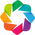

BokehModel(combine_events=True, render_bundle={'docs_json': {'e43457f1-62e6-4a4e-9f83-1a3daabf8660': {'version…

In [20]:
# Ensure the required extensions are loaded
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

# Plot with CartoLight tiles
my_map = stations.hvplot(geo=True, tiles='CartoLight', c=col, cmap='Viridis', size=200, title=col.title(), width=400, height=250)

# Create scatter and histogram plots
my_scatter = pd.DataFrame(stations).hvplot.scatter(x='airtemp °C', y='windspeed kmh', width=250, height=250)
my_hist = pd.DataFrame(stations).hvplot.hist('airtemp °C', width=250, height=250)

# Link selections for scatter and histogram only
linked = hv.link_selections(my_hist + my_scatter)

# Combine the map with the linked plots
combined = my_map + linked

# Set global options for better display
hv.opts.defaults(
    opts.Scatter(tools=['hover']),
    opts.Histogram(tools=['hover']),
    opts.WMTS(tools=['pan', 'wheel_zoom'])
)

# Display the combined plots directly
combined

In [ ]:
import panel as pn

In [ ]:
def my_plot(my_col='airtemp °C'):
    try: 
        my_map = stations.hvplot(geo=True, tiles='CartoLight', c=my_col, cmap='Viridis', size=200, title=my_col, width=400, height=250)
        my_hist = pd.DataFrame(stations).hvplot.hist(my_col, title=my_col, width=250, height=250)
        return link_selections(my_map + my_hist, index_cols=['id']) 
    except:
        pass
kw = dict(my_col=air_quality.columns)
pn.interact(my_plot, **kw)